In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the csv file using pandas
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
# printing the top 5 rows of the dataset
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
# link to the dataset
# archive.ics.uci.edu/ml/datasets/Statlog+%28Austrailian+Credit+Approval%29
# this dataset is taken from the above link and the data is real

# Data Set Information:

### This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 

### This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values. 



## Attribute Information:

There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3. 

A1: 0,1 CATEGORICAL (formerly: a,b) 
A2: continuous. 
A3: continuous. 
A4: 1,2,3 CATEGORICAL (formerly: p,g,gg) 
A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x) 
A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z) 
A7: continuous. 
A8: 1, 0 CATEGORICAL (formerly: t, f) 
A9: 1, 0	CATEGORICAL (formerly: t, f) 
A10: continuous. 
A11: 1, 0	CATEGORICAL (formerly t, f) 
A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p) 
A13: continuous. 
A14: continuous. 
A15: 1,2 class attribute (formerly: +,-)

In [5]:
# extracting information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


In [6]:
# description of the dataset
dataset.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


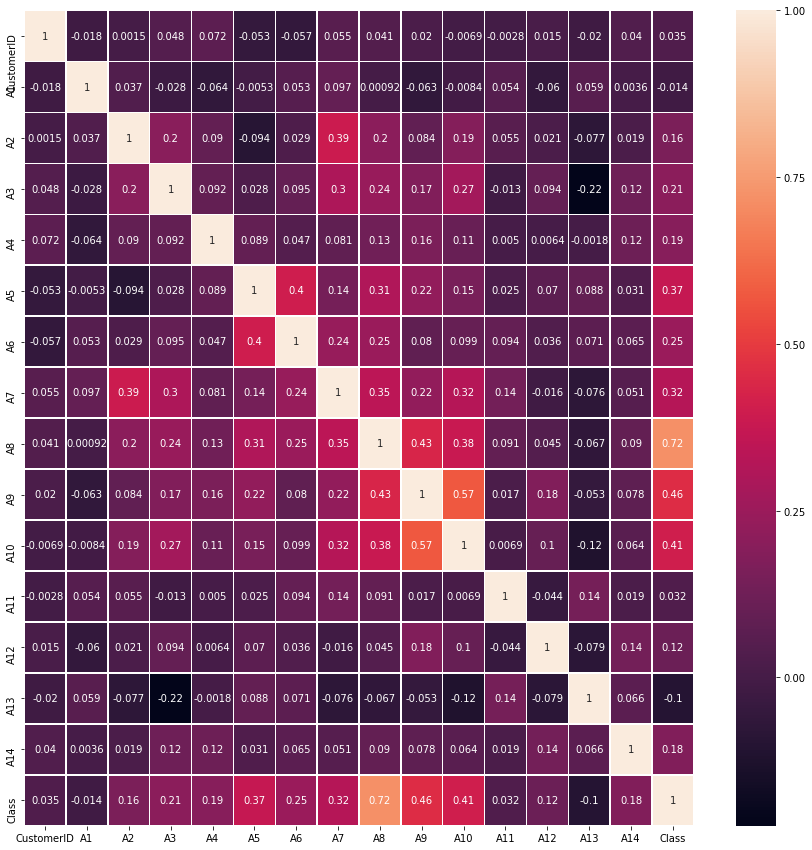

In [7]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(dataset.corr(), linewidths=.5, annot = True, ax = ax)

In [8]:
# columns that have negative corelation with the output class are A1 column and A13 column
# plotting the negative corelation with the output class with the help of the pairplot

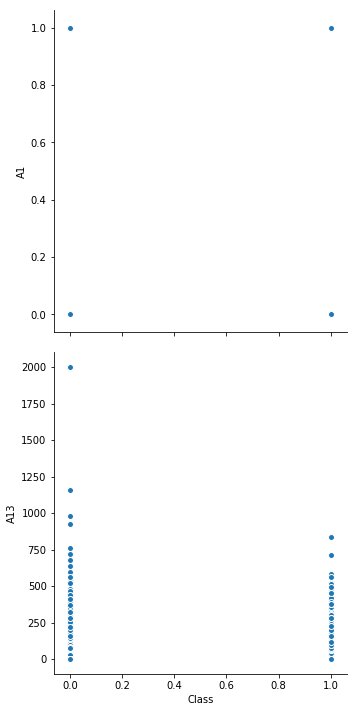

In [9]:
sns.pairplot(dataset, x_vars = ['Class'], y_vars = ['A1', 'A13'], size = 5)

In [10]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [11]:
# counting how many clients belongs to which class
ones = dataset[dataset['Class'] == 1]
ones.A1.count()

307

In [12]:
# counting how many clients belongs to which class
dataset[dataset['Class'] == 0]['A1'].count()

383

In [13]:
dataset.shape

(690, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C28E66AFD0>,
      dtype=object)

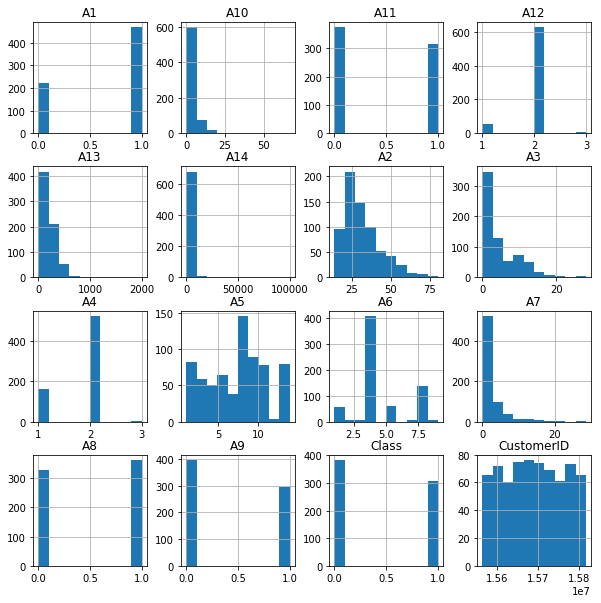

In [14]:
dataset.hist(figsize=(10, 10))

In [15]:
# column A2, A7, A3 have exponential distribution

C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1729: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C28ED9D358>,
      dtype=object)

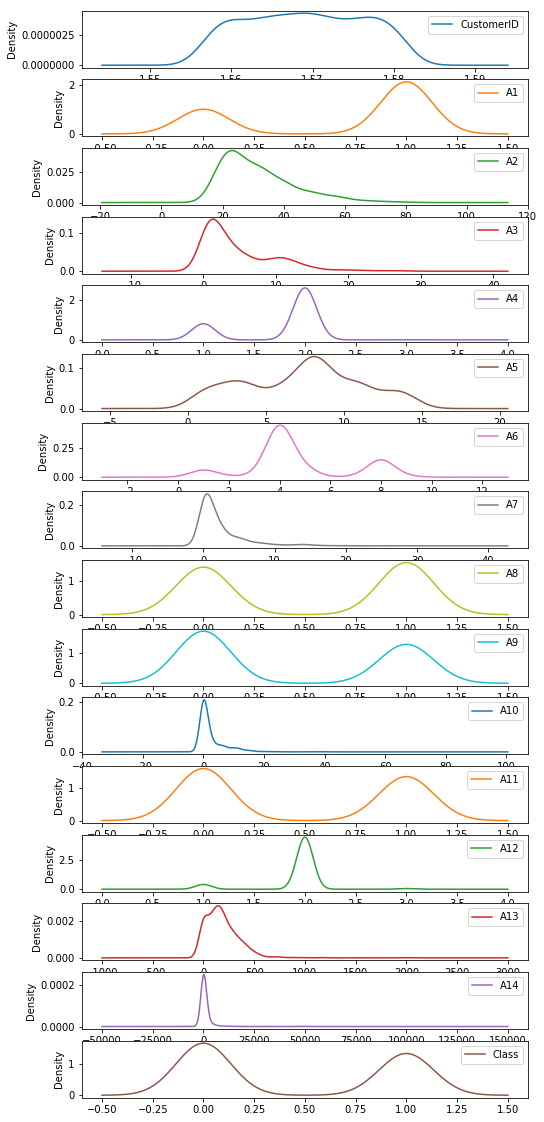

In [16]:
fig, ax = plt.subplots(figsize = (8, 20))
dataset.plot(kind='density', subplots=True, sharex=False, ax=ax)

In [17]:
# with these plots it an be seen that columns have data in exponential and gaussian pattern

In [18]:
# splitting up the datasets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [19]:
X.shape

(690, 15)

In [20]:
# feature Scaling
# feature scaling will convert the data of the dataset to the same scale
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [21]:
# training the SOM
# We will import MiniSom as there is no library present in scikit learn for SOM
# we will use grid of 10 by 10 
# we have 15 attributes therefore inout_len = 15
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 10)

# Visualisation

#### in this plot we will use pylab

In [22]:
from pylab import pcolor, bone, colorbar, plot, show

In [23]:
%matplotlib inline
bone()

on the map we will add mean inter nuoron distance for the winnning node that the SOM identified
and we will not add the figures of the mean inter neuron distance but we will add Colors which will classify different 
regions. Differnt colors will signify different range of mean inter neuron distance on the self organising map 

For this we will use pcolor function and inside this we will old values of mean inter neuron distance of all the winning nodes of our self organising maps
*distance_map* method will help to find the mean inter_neuron distance of all the winning nodes
*distance_map* method will return matrix of mean_inter_neuron distance(older values)

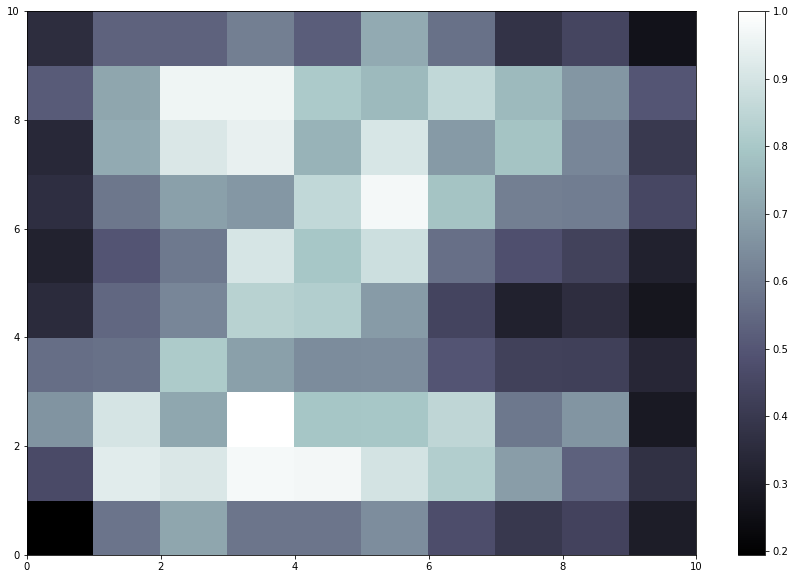

In [24]:
from pylab import pcolor, bone, colorbar, plot, show
bone()
fig, ax = plt.subplots(figsize=(15, 10))
pcolor(som.distance_map().T)
colorbar()

The colorbar on the right of the graph represents the normalised values btw 0 and 1 of the mean inter neuron distance
highest mean_interneuron distances coresponds to the white color and smallest mean interneuron distances corresponds to the dark color

#### The frauds are identified by the outlying winning nodes, mean the nodes whose *mean_inter_neuron_distance* corresponds to white color in colormap. Outlying winning nodes are far from the general rules
#### majority of dark colors are close to each other because their *mean_inter_neuron_distance* is pretty low

we will now add some markers to differentiate btw the customers who got approval but cheated and the customers 
who did not cheated and also got the approval

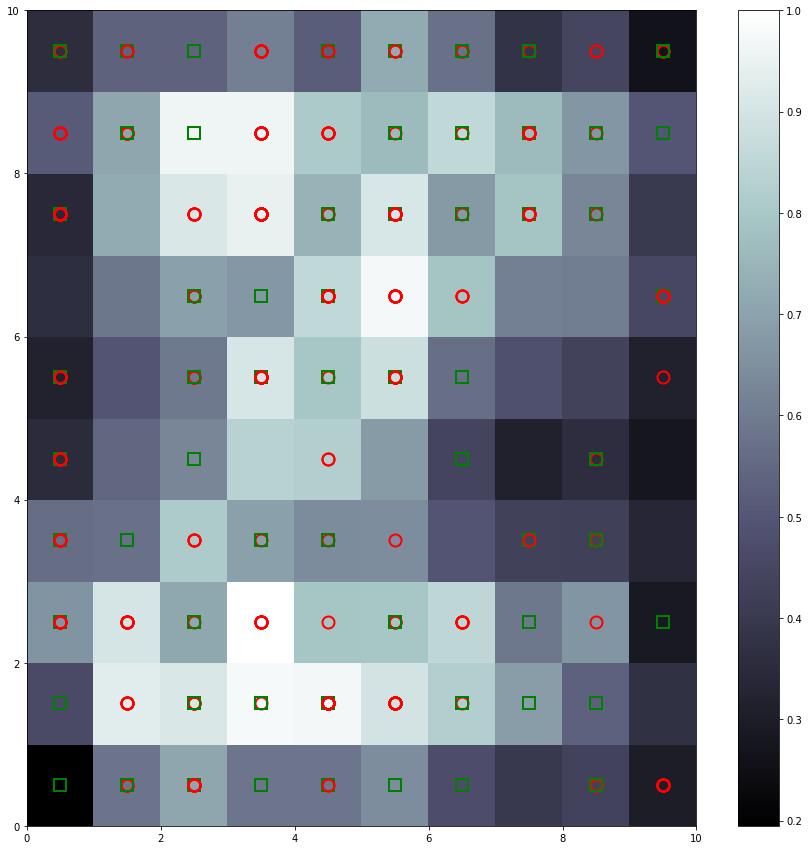

In [25]:
# visualising the results
from pylab import pcolor, bone, colorbar, plot, show
bone()
fig, ax = plt.subplots(figsize=(15, 15))
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5, 
        markers[y[i]], 
        markeredgecolor = colors[y[i]], 
        markerfacecolor = 'None',
        markersize = 12,
        markeredgewidth = 2)
show()

# Summary

In [32]:
# finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[3, 1], mappings[4, 1]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [33]:
frauds_df = pd.DataFrame(frauds)

In [34]:
frauds_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15646082.0,0.0,18.83,4.415,1.0,8.0,8.0,3.000,1.0,0.0,0.0,0.0,2.0,240.0,1.0
1,15604536.0,0.0,20.50,11.835,2.0,8.0,8.0,6.000,1.0,0.0,0.0,0.0,2.0,340.0,1.0
2,15635598.0,0.0,24.58,0.670,2.0,6.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,400.0,1.0
3,15650591.0,0.0,26.08,8.665,2.0,6.0,4.0,1.415,1.0,0.0,0.0,0.0,2.0,160.0,151.0
4,15675450.0,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0
5,15737627.0,1.0,16.17,0.040,2.0,8.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,0.0,1.0
6,15709459.0,1.0,29.42,1.250,2.0,9.0,4.0,1.750,0.0,0.0,0.0,0.0,2.0,200.0,1.0
7,15752139.0,1.0,36.50,4.250,2.0,11.0,4.0,3.500,0.0,0.0,0.0,0.0,2.0,454.0,51.0
8,15766906.0,1.0,29.83,3.500,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,216.0,1.0
9,15655464.0,1.0,21.25,1.500,2.0,9.0,4.0,1.500,0.0,0.0,0.0,0.0,2.0,150.0,9.0


In [35]:
customers = dataset.iloc[:, 1:].values

In [38]:
customers_df = pd.DataFrame(customers)
customers_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,22.08,11.46,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.00,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.75,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.50,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.17,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0


In [39]:
# creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [41]:
len(is_fraud)

690

In [42]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [79]:
# ANN
import keras


In [80]:
from keras.models import Sequential
from keras.layers import Dense

In [81]:
classifier = Sequential()

In [82]:
classifier.add(Dense(units = 2, activation = 'relu', kernel_initializer='glorot_uniform', input_dim = 15))

In [83]:
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [84]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [85]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs=3)

Epoch 1/3
690/690 [==============================] - 1s 2ms/step - loss: 0.4425 - acc: 0.9362
Epoch 2/3
690/690 [==============================] - 1s 1ms/step - loss: 0.2997 - acc: 0.9362
Epoch 3/3
690/690 [==============================] - 1s 1ms/step - loss: 0.2304 - acc: 0.9362


In [95]:
# predicting the probabilities
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [100]:
display = pd.DataFrame(y_pred)

In [101]:
display.shape

(690, 2)